# Women scientists funding in Switzerland

---

by Joao Martins

In [1]:
# boilerplate
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(10, 6)})

# tidy datasets
grants=pd.read_feather('data/project.feather')
grants=grants.dropna(subset=['start_date'])
grants['year'] = grants['start_date'].dt.year
grantees=pd.read_feather('data/grantee.feather')
people=pd.read_feather('data/person.feather')

# main dataframe with project leaders and project employees
df=grantees.query('role in ["employee", "responsible_applicant"]').merge(grants, on='project_number')
# add gender information
df=df.merge(people[['person_id_snsf', 'gender']], on='person_id_snsf')
df = df.drop(['index_x', 'index_y'], axis=1)
## make
## $ jupyter nbconvert slide_deck.ipynb --to slides --post serve --template assets/style/output_toggle.tlp

## Leaky pipeline for women scientists

It is well-known that there is a lack of women in leadership positions across domains.  Women in science are no exception: academic careers are known for leaking more women than men.

Further reading: 
1. [Leaky pipeline for women scientists dries up after they win first big grant](https://www.nature.com/articles/d41586-018-05759-w), _in Nature, 2018_
2. [A Leak in the Academic Pipeline](https://www.frontiersin.org/articles/10.3389/fpsyg.2019.01297/full), _in Frontiers, 2019_

## Swiss case: funding women scientists

In Switzerland, a small country known for its investment in R&D, the problem lead to a dedicated website: [fix-the-leaky-pipeline.ch](https://www.fix-the-leaky-pipeline.ch).

Q: _But is there good evidence for the "leaky academic pipeline" in Switzerland?_

A: _Yes._

## Finding the evidence

The leading public science funding agency in Switzerland makes its data freely available:  
 - 74.5k science projects, spanning across the last 50 years  
 - 112k individuals involved in the projects  
 - gender information for all those individuals!  

Source: [p3.snf.ch](http://p3.snf.ch/Pages/DataAndDocumentation.aspx)

In [2]:
employees_counts = df.query('role == "employee"').groupby(['year', 'gender']).size().reset_index().rename(columns={0:'count'})
employees_counts = employees_counts.query('(year > 1999) & (year < 2020)')
employees_counts['gender'] = employees_counts.gender.astype(str) # no pivot without !!!!
employees_counts = employees_counts.pivot_table(index=['year'],columns='gender',values='count',fill_value=0)
employees_counts["female"] = employees_counts.female.astype(float)
employees_counts["male"] = employees_counts.male.astype(float)
employees_counts = employees_counts.reset_index()
employees_counts['female_percent'] = 100 * employees_counts['female'] / (employees_counts['male'] + employees_counts['female'])

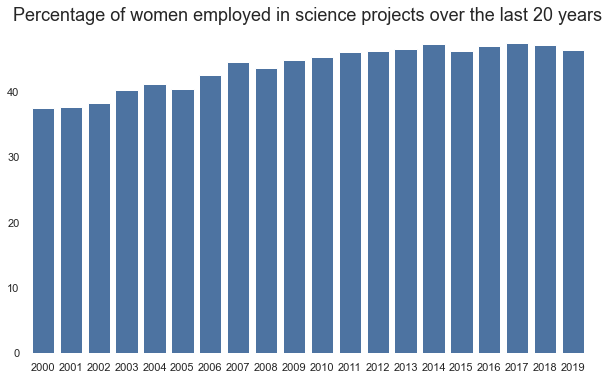

In [3]:
plt.box(on=None) 
sns.set_style("whitegrid")
g=sns.barplot(x='year', y='female_percent', color='#3f72af', data=employees_counts)
g.set_xlabel('')
g.set_ylabel('')
g.set_title('Percentage of women employed in science projects over the last 20 years', fontsize = 18)
fig = g.get_figure()
fig.savefig("plot1.png")

## Share of women employed in science projects


![plot 1](plot1.png "Percentage of women employed in science projects")

In [4]:
pi_counts = df.query('role == "responsible_applicant"').groupby(['year', 'gender']).size().reset_index().rename(columns={0:'count'})
pi_counts = pi_counts.query('(year > 1999) & (year < 2020)')
pi_counts['gender'] = pi_counts.gender.astype(str) # no pivot without !!!!
pi_counts = pi_counts.pivot_table(index=['year'],columns='gender',values='count',fill_value=0)
pi_counts["female"] = pi_counts.female.astype(float)
pi_counts["male"] = pi_counts.male.astype(float)
pi_counts = pi_counts.reset_index()
pi_counts['female_percent'] = 100 * pi_counts['female'] / (pi_counts['male'] + pi_counts['female'])

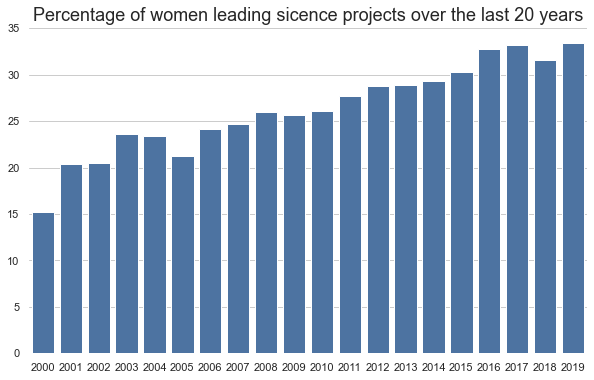

In [5]:
plt.box(on=None) 
sns.set_style("whitegrid")
g=sns.barplot(x='year', y='female_percent', color='#3f72af', data=pi_counts)
g.set_xlabel('')
g.set_ylabel('')
g.set_title('Percentage of women leading sicence projects over the last 20 years', fontsize = 18)
fig = g.get_figure()
fig.savefig("plot2.png")

## Share of women leading science projects


![plot 2](plot2.png "Percentage of women leading science projects")

In [6]:
gap = pi_counts.merge(employees_counts, on='year')
gap['gap_ratio'] = gap['female_percent_x'] / gap['female_percent_y']

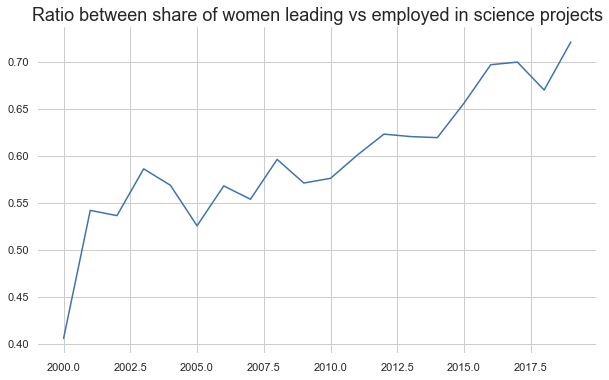

In [7]:
plt.box(on=None) 
sns.set_style("whitegrid")
g=sns.lineplot(x='year', y='gap_ratio', color='#3f72af', data=gap)
g.set_xlabel('')
g.set_ylabel('')
g.set_title('Ratio between share of women leading vs employed in science projects', fontsize = 18)
fig = g.get_figure()
fig.savefig("plot3.png")

## Women leadership gap

![plot 3](plot3.png "Ratio bewteen women leading and employed in science projects")

## Conclusion

> Steady improvement of the gap between the share of women leading science projects and that of women employed in science projects in Switzerland.

Further reading: [Promotion of women by the SNSF](http://www.snf.ch/en/researchinFocus/newsroom/Pages/news-181004-promotion-of-women-by-the-snsf.aspx)